<a href="https://colab.research.google.com/github/shaniaking/Sentiment-Analysis-DS340W/blob/Week-1-Code-Implementation/Sentiment_Analysis_of_IMDB_Movie_Reviews_(Week_1_Implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


#Load Dataset
df = pd.read_csv("IMDB Dataset.csv")

#Label Data
X = df["review"]
y = df["sentiment"]

#Split Data
  #Validation
X_temp, X_validation, y_temp, y_validation = train_test_split(X, y, test_size=0.1, random_state=42)
  #Remaining goes into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.22, random_state=42)

print(f"Training Data: {len(X_train)}")
print(f"Testing Data: {len(X_test)}")
print(f"Validation Data: {len(X_validation)}")

Training Data: 35100
Testing Data: 9900
Validation Data: 5000


In [6]:
#Preproccessing
  #Remove punctuation and symbols and convert to lowercase
def preprocess_review(text):
    #Convert to lowercase
    text = text.lower()
    #Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

X_train = X_train.apply(preprocess_review)
X_test = X_test.apply(preprocess_review)
#X_val = X_val.apply(preprocess_review) - still unseen
#Show review rows
print(X_train)
print(X_test)

13672    melvyn douglas and joan blondell costar in the...
8077     its rare nowadays to find a romantic comedy th...
20027    chip foose is an absolute genius and the end r...
40822    i was watching this movie and getting increasi...
30437    this movie is just downright horrible the movi...
                               ...                        
10732    this was one of the biggest pieces of crap i h...
30306    investigative reporter darren mcgavin as carl ...
22813    something i really love about this womans shor...
5329     this movie was just plain bad just about every...
7871     the three stooges has always been some of the ...
Name: review, Length: 35100, dtype: object
32924    br br once i ignored some of the implausibilit...
17135    boston legal has turned its tail and is headed...
40970    i bought this dvd after seeing it highly ranke...
48566    this is a madefortv and rather needless scifi ...
13545    i expected fame to be an uplifting film but it...
             

In [7]:
#TF-IDF Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=20000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)

  #Transform test set
X_test_tfidf = vectorizer.transform(X_test)

#Validation set remains untouched until final evaluation
#X_val_tfidf = vectorizer.transform(X_val)

In [19]:
#Model Training
#Logistic Regression
  #Initialize Logistic Regression model
lr = LogisticRegression(max_iter=200, random_state=0)

  #Train on training TF-IDF features
lr.fit(X_train_tfidf, y_train)

  #Predict on test set
y_test_pred_lr = lr.predict(X_test_tfidf)

  #Calculate metrics for positive class
precision_lr = precision_score(y_test, y_test_pred_lr, pos_label='positive')
recall_lr = recall_score(y_test, y_test_pred_lr, pos_label='positive')
f1_lr = f1_score(y_test, y_test_pred_lr, pos_label='positive')

  #Print results
print("Logistic Regression Performance on Test Set:")
print(f"Precision: {precision_lr:.3f}")
print(f"Recall: {recall_lr:.3f}")
print(f"F1-score: {f1_lr:.3f}")

#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)

  #Train the model
rf.fit(X_train_tfidf, y_train)

  #Predict on the test set
y_test_pred_rf = rf.predict(X_test_tfidf)

  #Calculate metrics for positive class
precision_rf = precision_score(y_test, y_test_pred_rf, pos_label='positive')
recall_rf = recall_score(y_test, y_test_pred_rf, pos_label='positive')
f1_rf = f1_score(y_test, y_test_pred_rf, pos_label='positive')

  #Print results
print("Random Forest Performance on Test Set:")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"F1-score: {f1_rf:.3f}")

#Decision Tree
dt = DecisionTreeClassifier(random_state=42)

  #Train the model
dt.fit(X_train_tfidf, y_train)

  #Predict on the test set
y_test_pred_dt = dt.predict(X_test_tfidf)

  #Calculate metrics for positive class
precision_dt = precision_score(y_test, y_test_pred_dt, pos_label='positive')
recall_dt = recall_score(y_test, y_test_pred_dt, pos_label='positive')
f1_dt = f1_score(y_test, y_test_pred_dt, pos_label='positive')

  #Print results
print("Decision Tree Performance on Test Set:")
print(f"Precision: {precision_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1-score: {f1_dt:.3f}")

Logistic Regression Performance on Test Set:
Precision: 0.882
Recall: 0.915
F1-score: 0.898
Random Forest Performance on Test Set:
Precision: 0.854
Recall: 0.859
F1-score: 0.856
Decision Tree Performance on Test Set:
Precision: 0.729
Recall: 0.730
F1-score: 0.730


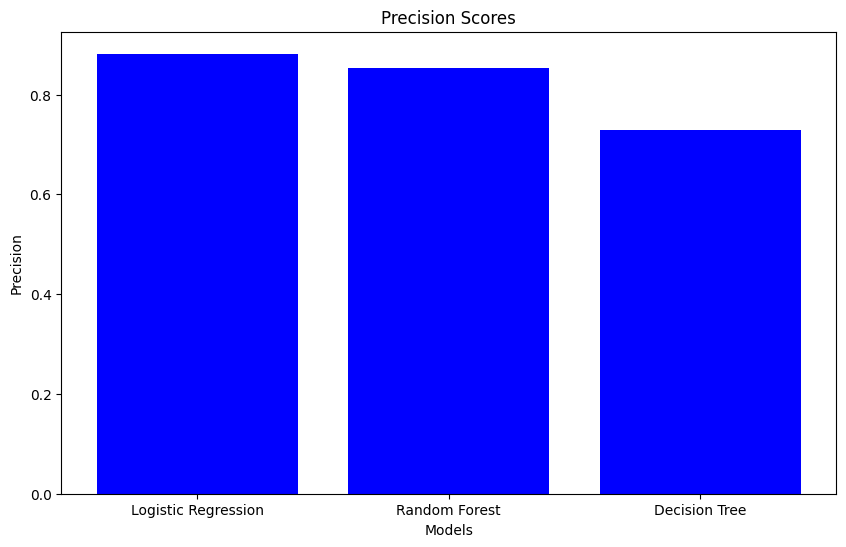

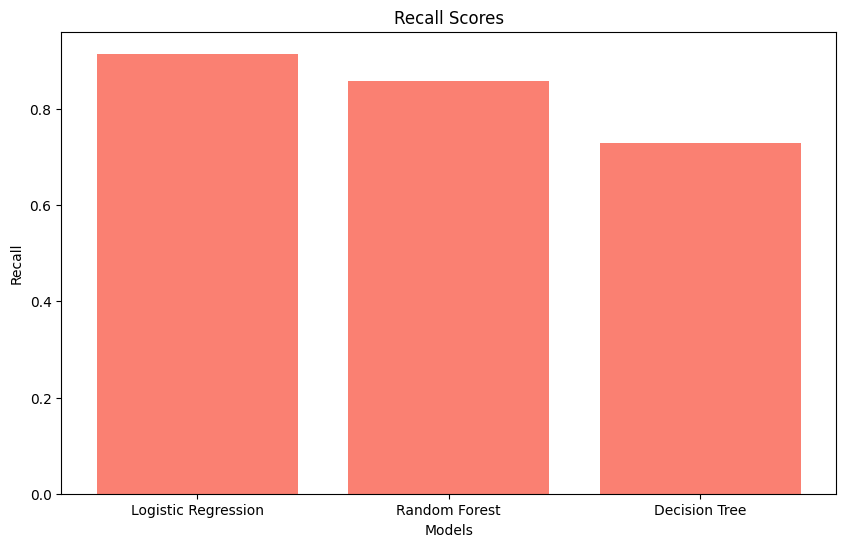

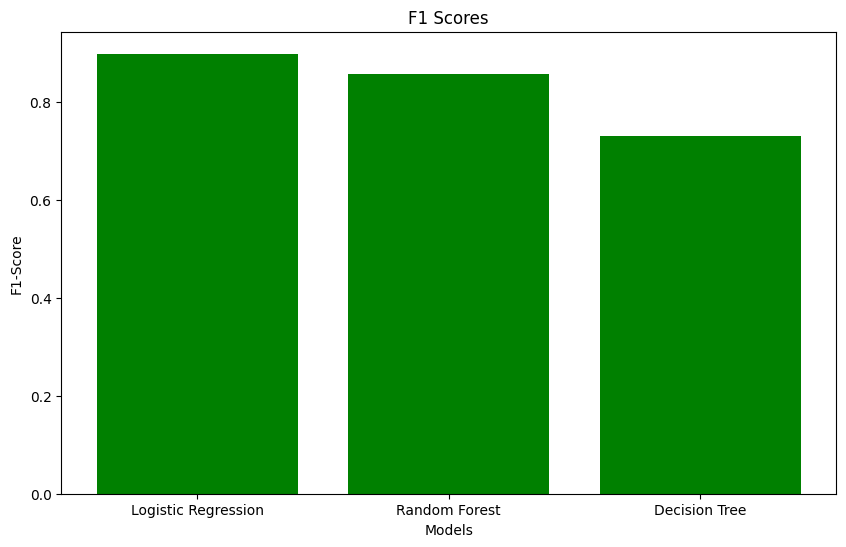

In [23]:
#Bar Chart Models
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
precisions = [precision_lr, precision_rf, precision_dt]
recalls = [recall_lr, recall_rf, recall_dt]
f1_scores = [f1_lr, f1_rf, f1_dt]
  #Precision Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color='blue')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Scores')
plt.show()
  #Recall Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(models, recalls, color='salmon')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Scores')
plt.show()

  #F1 Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='green')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1 Scores')
plt.show()

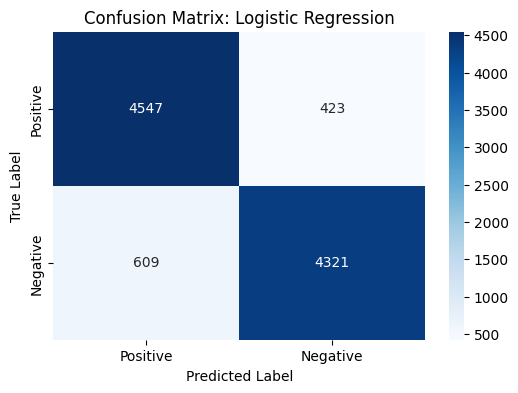

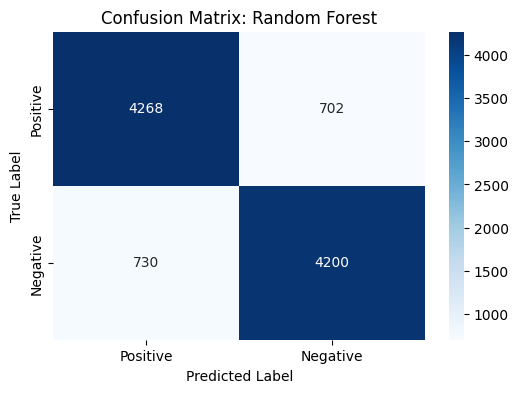

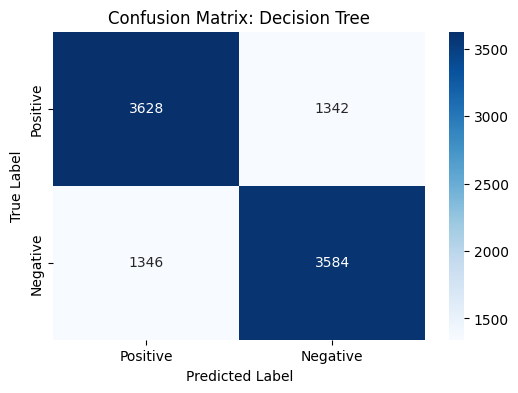

In [25]:
#Confusion Matrix Models
#List of models
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
predictions = [y_test_pred_lr, y_test_pred_rf, y_test_pred_dt]

for model_name, y_pred in zip(models, predictions):
    cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()